<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

---

In [9]:
# data_folder = os.getcwd() + '/data/'
data_folder = '/Users/xu.zhu/Desktop/Data/PotentialShop/'

In [10]:
feature_check_df = pd.read_csv(os.path.join(data_folder, 'RawData_Listing.csv'))
feature_check_df.shape[0]
feature_check_df.dropna(subset=['main_category'], inplace=True)
feature_check_df.dropna(subset=['performance_ADO'], inplace=True)
feature_check_df.shape[0]
feature_check_df.head(3)

12932

7143

,shopid,username,main_category,ctime,performance_ADO,performance_ADGMV_usd,F90D_ADO,pct_repeated_buyer_90_days,pct_repeated_buyer_99,pct_repeated_buyer_11,...,Dday_11_CR,Dday_12_CR,Dday_99_CTR,Dday_11_CTR,Dday_12_CTR,ten_order_days,F90D_hotSKU_pct,Dday_99_hotSKU_pct,Dday_11_hotSKU_pct,Dday_12_hotSKU_pct
0,149139653,good1402.my,Men Clothes,2019-05-23,0.066667,0.473839,0.200000,0.0588,0.0000,0.0000,...,0.008850,0.029630,0.0216,0.0102,0.0171,53.0,0.0000,0.0,0.0,0.0
1,146815488,muziyis.my,Women Clothes,2019-05-13,0.733333,7.330148,0.844444,0.2093,0.0000,0.0909,...,0.014286,0.014286,0.0506,0.0442,0.0425,44.0,0.0003,0.0,0.0,0.0
2,140388153,baoblaze.my,Automotive,2019-04-24,4.066667,42.088130,1.511111,0.0794,0.0909,0.0000,...,0.030151,0.026253,0.0390,0.0327,0.0347,41.0,0.0012,0.0,0.0,0.0


In [11]:
raw_data = feature_check_df.drop(columns=['ctime', 'username', 'shopid', 'main_category',
                                          'performance_ADGMV_usd'])


In [12]:
raw_data = raw_data[raw_data['performance_ADO']>0]

In [13]:
correction = raw_data.corr()
correction

,performance_ADO,F90D_ADO,pct_repeated_buyer_90_days,pct_repeated_buyer_99,pct_repeated_buyer_11,pct_repeated_buyer_12,num_repeated_buyers_on_99,num_buyers_uplift_99,num_repeated_buyers_uplift_99,num_repeated_buyers_on_11,...,Dday_11_CR,Dday_12_CR,Dday_99_CTR,Dday_11_CTR,Dday_12_CTR,ten_order_days,F90D_hotSKU_pct,Dday_99_hotSKU_pct,Dday_11_hotSKU_pct,Dday_12_hotSKU_pct
performance_ADO,1.000000,0.423336,0.024268,0.020809,0.016958,0.017412,0.585347,0.086397,0.160013,0.819966,...,0.100837,0.091307,0.017833,0.017510,0.004633,-0.170205,0.305179,0.195698,0.304919,0.382161
F90D_ADO,0.423336,1.000000,0.042930,0.005483,0.002335,0.005452,0.459885,-0.036487,-0.025351,0.378911,...,0.074798,0.067546,-0.008464,-0.015486,-0.013838,-0.322532,0.466217,0.080286,0.143527,0.099030
pct_repeated_buyer_90_days,0.024268,0.042930,1.000000,0.094561,0.042564,0.060775,0.056609,-0.038875,-0.042036,0.042810,...,-0.019347,-0.004660,0.059591,0.051613,0.071310,0.013014,0.082772,0.011044,0.010473,-0.010183
pct_repeated_buyer_99,0.020809,0.005483,0.094561,1.000000,0.134385,0.098631,0.187875,-0.000354,0.333082,0.041268,...,0.009193,-0.005145,0.021272,0.013479,0.027808,-0.024681,0.045057,0.025912,0.010377,-0.000514
pct_repeated_buyer_11,0.016958,0.002335,0.042564,0.134385,1.000000,0.062757,0.063306,0.002782,0.072492,0.116506,...,0.012248,-0.012060,0.018363,-0.007740,0.008503,0.007636,0.028943,0.013719,0.001184,-0.001483
pct_repeated_buyer_12,0.017412,0.005452,0.060775,0.098631,0.062757,1.000000,0.069536,0.023077,0.092994,0.043938,...,0.021128,-0.000881,0.006725,0.018068,0.020991,0.007398,0.013626,0.018705,0.007439,0.003014
num_repeated_buyers_on_99,0.585347,0.459885,0.056609,0.187875,0.063306,0.069536,1.000000,0.091627,0.390318,0.653885,...,0.075653,0.058496,0.010547,-0.002385,-0.009011,-0.138919,0.313726,0.197869,0.197988,0.201448
num_buyers_uplift_99,0.086397,-0.036487,-0.038875,-0.000354,0.002782,0.023077,0.091627,1.000000,0.485881,0.102712,...,0.029345,0.021713,0.004867,0.001554,-0.005649,0.074567,-0.012350,0.050933,0.126041,0.163116
num_repeated_buyers_uplift_99,0.160013,-0.025351,-0.042036,0.333082,0.072492,0.092994,0.390318,0.485881,1.000000,0.240815,...,0.084723,0.052686,0.014697,-0.005395,-0.003745,0.049964,0.004226,0.057653,0.086844,0.063708
num_repeated_buyers_on_11,0.819966,0.378911,0.042810,0.041268,0.116506,0.043938,0.653885,0.102712,0.240815,1.000000,...,0.087352,0.064537,0.014547,-0.001049,-0.013450,-0.132212,0.277936,0.247335,0.337060,0.365095


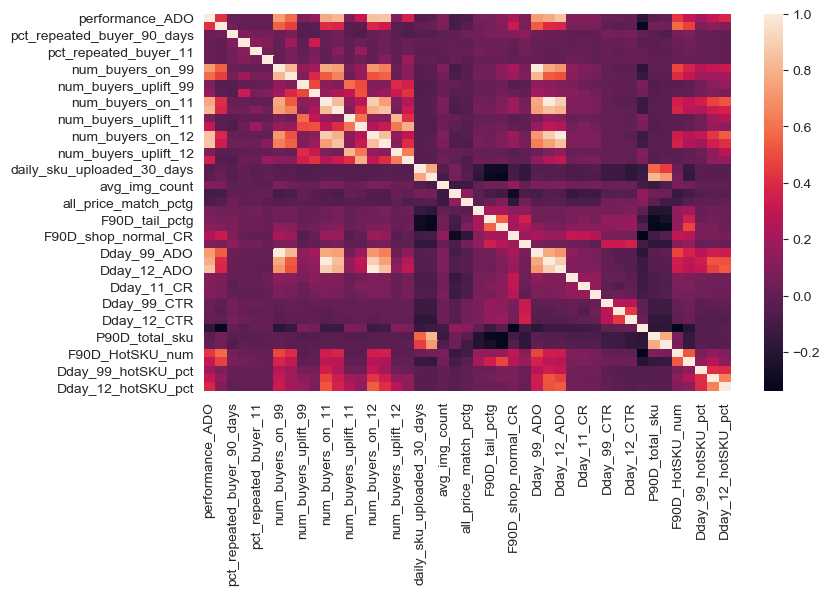

In [77]:
fig = plt.figure(1, figsize=[8.5, 5], dpi=100)

ax = sns.heatmap(correction)
plt.show()

In [63]:
sns.set_style('darkgrid')

<Figure size 560x240 with 0 Axes>

Text(0.5, 0, 'F90D ADO')

Text(0, 0.5, 'Performance ADO')

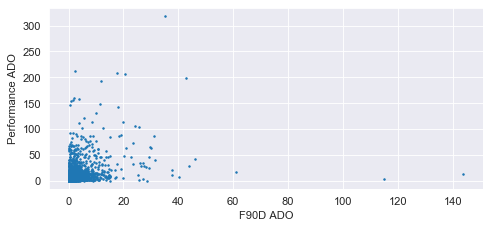

In [64]:
plt.figure(1, figsize=[7, 3], dpi=80)

plt.scatter(raw_data['F90D_ADO'], raw_data['performance_ADO'], s=1.5)
plt.xlabel('F90D ADO')
plt.ylabel('Performance ADO')

<Figure size 560x240 with 0 Axes>

Text(0.5, 0, 'F90D_shop_normal_CR')

Text(0, 0.5, 'Performance ADO')

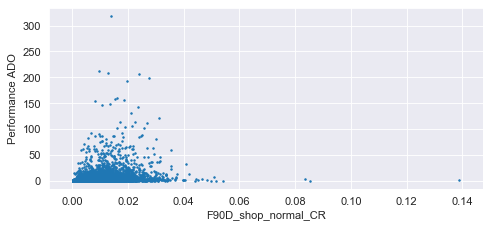

In [65]:
plt.figure(1, figsize=[7, 3], dpi=80)
plt.scatter(raw_data['F90D_shop_normal_CR'], raw_data['performance_ADO'], s=1.5)
#plt.xlim(0, 0.5)
plt.xlabel('F90D_shop_normal_CR')
plt.ylabel('Performance ADO')

<Figure size 560x240 with 0 Axes>

Text(0.5, 0, 'F90D_price_match_pctg')

Text(0, 0.5, 'Performance ADO')

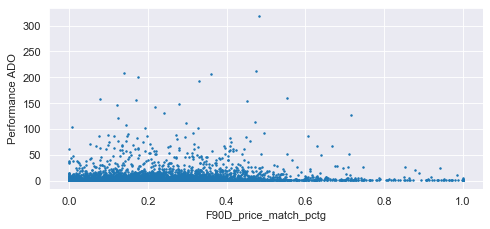

In [85]:
plt.figure(1, figsize=[7, 3], dpi=80)
plt.scatter(raw_data['F90D_price_match_pctg'], raw_data['performance_ADO'], s=1.5)
#plt.xlim(0, 0.5)
plt.xlabel('F90D_price_match_pctg')
plt.ylabel('Performance ADO')

<Figure size 560x240 with 0 Axes>

Text(0.5, 0, 'all_price_match_pctg')

Text(0, 0.5, 'Performance ADO')

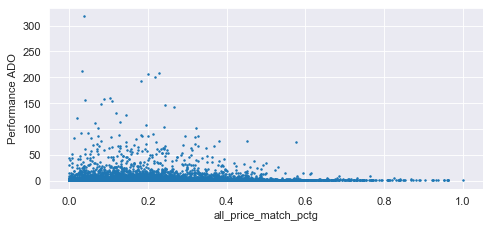

In [84]:

plt.figure(1, figsize=[7, 3], dpi=80)
plt.scatter(raw_data['all_price_match_pctg'], raw_data['performance_ADO'], s=1.5)
#plt.ylim(0, 50)
plt.xlabel('all_price_match_pctg')
plt.ylabel('Performance ADO')